## Hierarchical clustering 範例

## 範例目標：讓同學了解如何使用 sklearn 執行 hierarchical clustering

## 範例重點：設定 模型估計參數 以及 資料建模 兩大區塊

(Optional) 若尚未安裝相關套件，執行下一行，然後 restart kernel

In [1]:
# !pip3 install --user sklearn
# !pip3 install --user --upgrade matplotlib

載入套件

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import AgglomerativeClustering
from sklearn import datasets

np.random.seed(5)

%matplotlib inline

載入 toy example 資料集

In [3]:
toy = datasets.make_blobs(centers=3, n_features=4)
X = toy[0]
y = toy[1]

設定 模型 估計參數

In [4]:
estimators = [('hc_ward', AgglomerativeClustering(n_clusters=3, linkage="ward")),
              ('hc_complete', AgglomerativeClustering(n_clusters=3, linkage="complete")),
              ('hc_average', AgglomerativeClustering(n_clusters=3, linkage="average"))]

資料建模 並 視覺化 結果

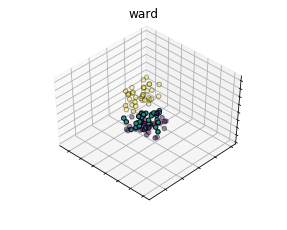

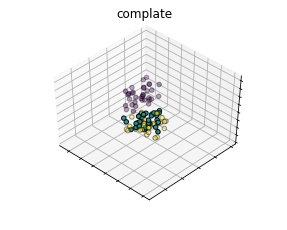

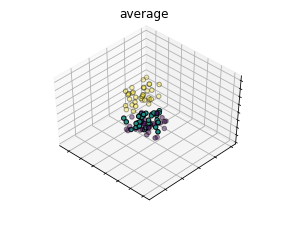

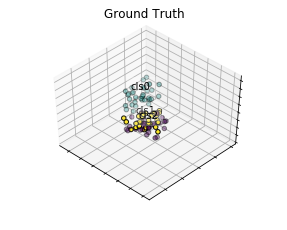

In [5]:
fignum = 1
titles = ['ward', 'complate', 'average']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    
    ## fit data
    est.fit(X)
    
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('cls0', 0),
                    ('cls1', 1),
                    ('cls2', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_title('Ground Truth')
ax.dist = 12

# fig.show()

## 作業

作業目標 : 用 iris (dataset.load_iris()) 資料嘗試跑 hierarchical clustering

In [6]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

載入 相關套件 並 執行 hierarchical clustering 實驗 ...

In [7]:
import numpy as np
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import AgglomerativeClustering
from sklearn import datasets

np.random.seed(5)

%matplotlib inline

from sklearn.cluster import KMeans

In [8]:
estimators = [('hc_single', AgglomerativeClustering(n_clusters=3, linkage="single")),
              ('hc_average', AgglomerativeClustering(n_clusters=3, linkage="average")),
              ('hc_complete', AgglomerativeClustering(n_clusters=3, linkage="complete")),
              ('hc_ward', AgglomerativeClustering(n_clusters=3, linkage="ward")),
              ('k_means_3', KMeans(n_clusters=3, init='k-means++')), # default 就是 k-means++ 了
              ('k_means_3_setParam', KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto', verbose=0, random_state=87, copy_x=True, n_jobs=-1, algorithm='auto'))
             ]

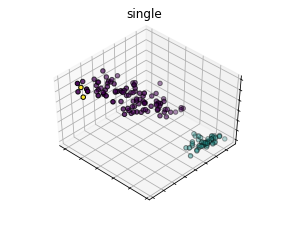

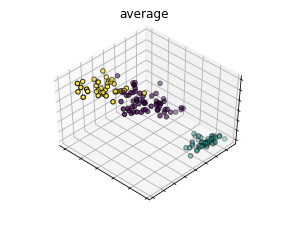

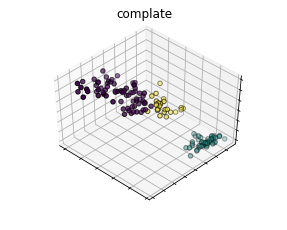

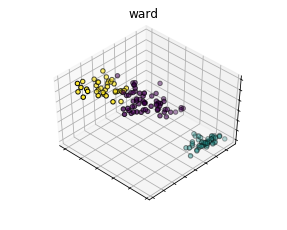

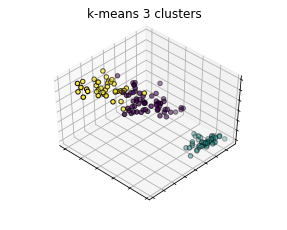

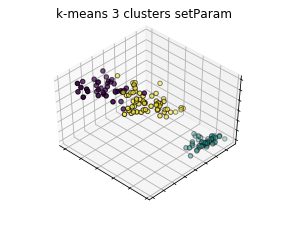

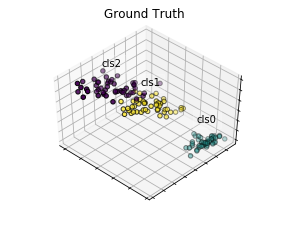

In [9]:
fignum = 1
titles = ['single', 'average', 'complate', 'ward', 'k-means 3 clusters', 'k-means 3 clusters setParam']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    
    ## fit data
    est.fit(X)
    
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('cls0', 0),
                    ('cls1', 1),
                    ('cls2', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_title('Ground Truth')
ax.dist = 12

# fig.show()

### 從這個結果論來看，Ward 跟 K-Means(設定n_cluster) 結果比較像(init預設本身就是kmeas++了)；而K-Means(設定其他參數) 跟 這次的 Ground Truth 比較像


### [2.3. Clustering¶scikit-learn.org](https://scikit-learn.org/stable/modules/clustering.html)


The AgglomerativeClustering object performs a hierarchical clustering using a bottom up approach: each observation starts in its own cluster, and clusters are successively merged together. The linkage criteria determines the metric used for the merge strategy:

1. <font color="dodgerblue">Ward minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and in this sense is similar to the k-means objective function but tackled with an agglomerative hierarchical approach.</font>

2. Maximum or complete linkage minimizes the maximum distance between observations of pairs of clusters.

3. Average linkage minimizes the average of the distances between all observations of pairs of clusters.

4. Single linkage minimizes the distance between the closest observations of pairs of clusters.

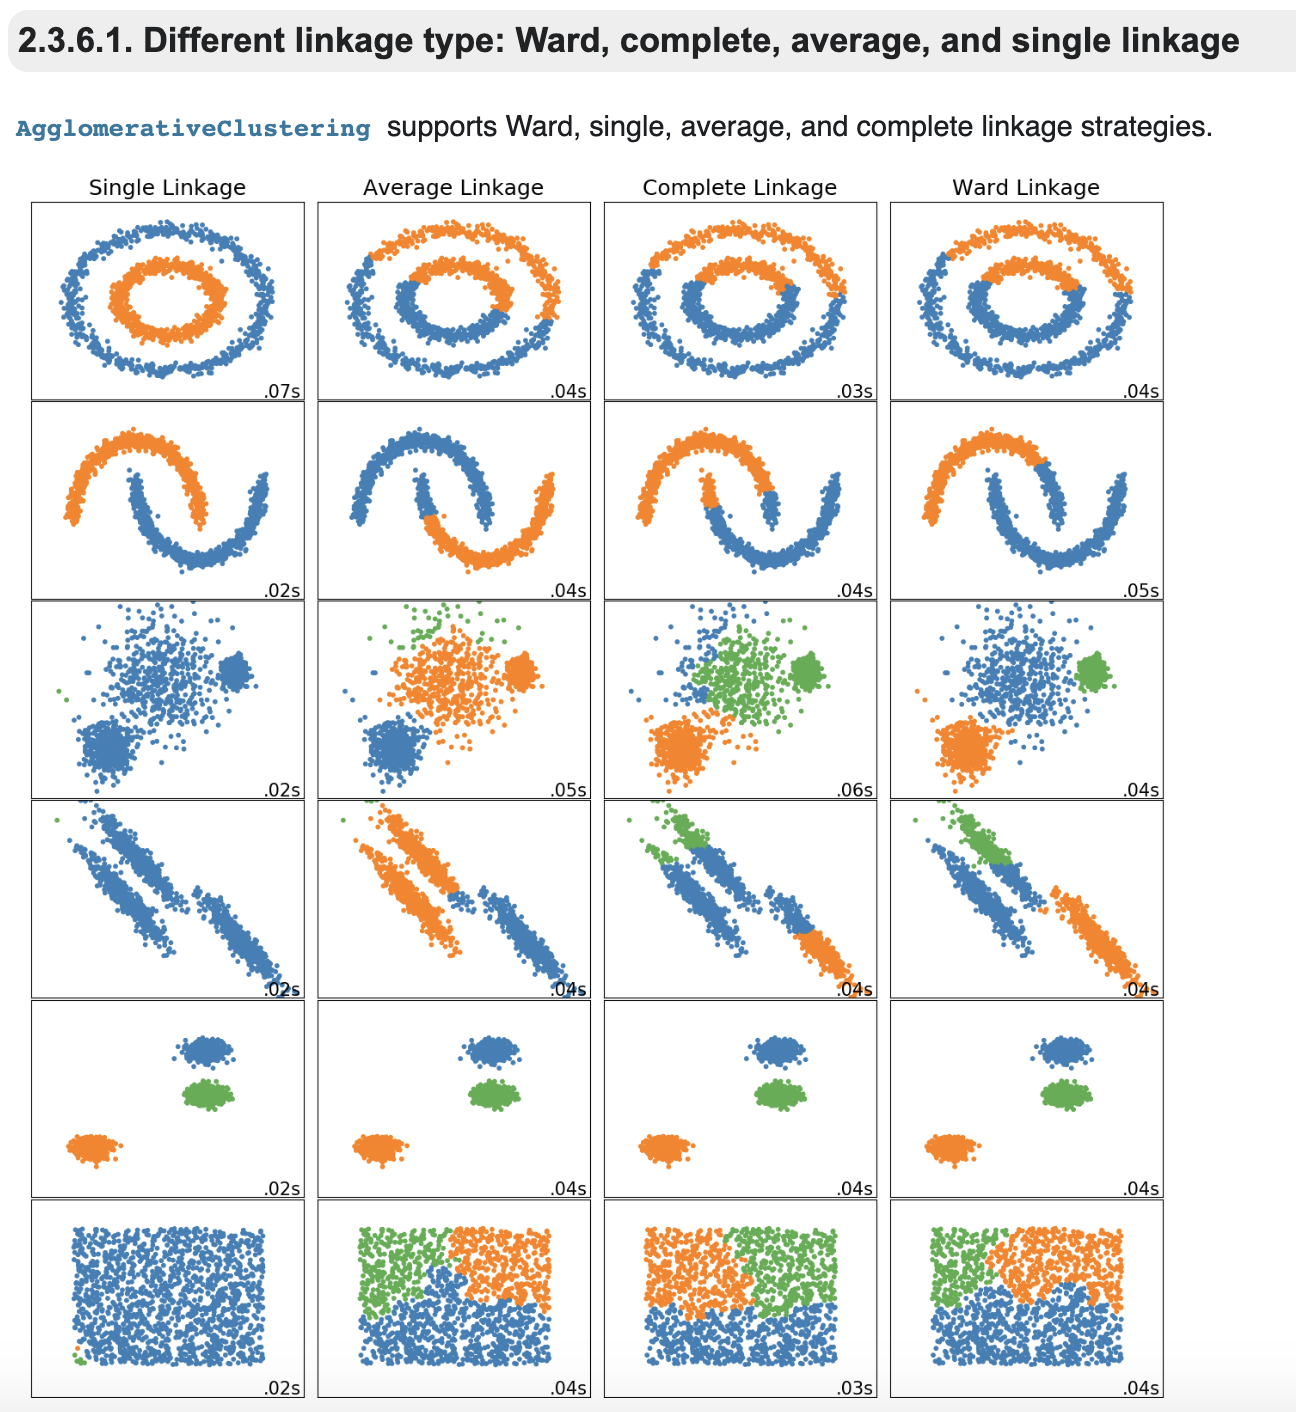

## [Distances between Clustering, Hierarchical Clustering 36-350, Data Mining 14 September 2009](https://www.stat.cmu.edu/~cshalizi/350/lectures/08/lecture-08.pdf)


> ### Ward’s method says that <font color="red">the distance between two clusters, A and B, is how much the sum of squares will increase when we merge them</font>

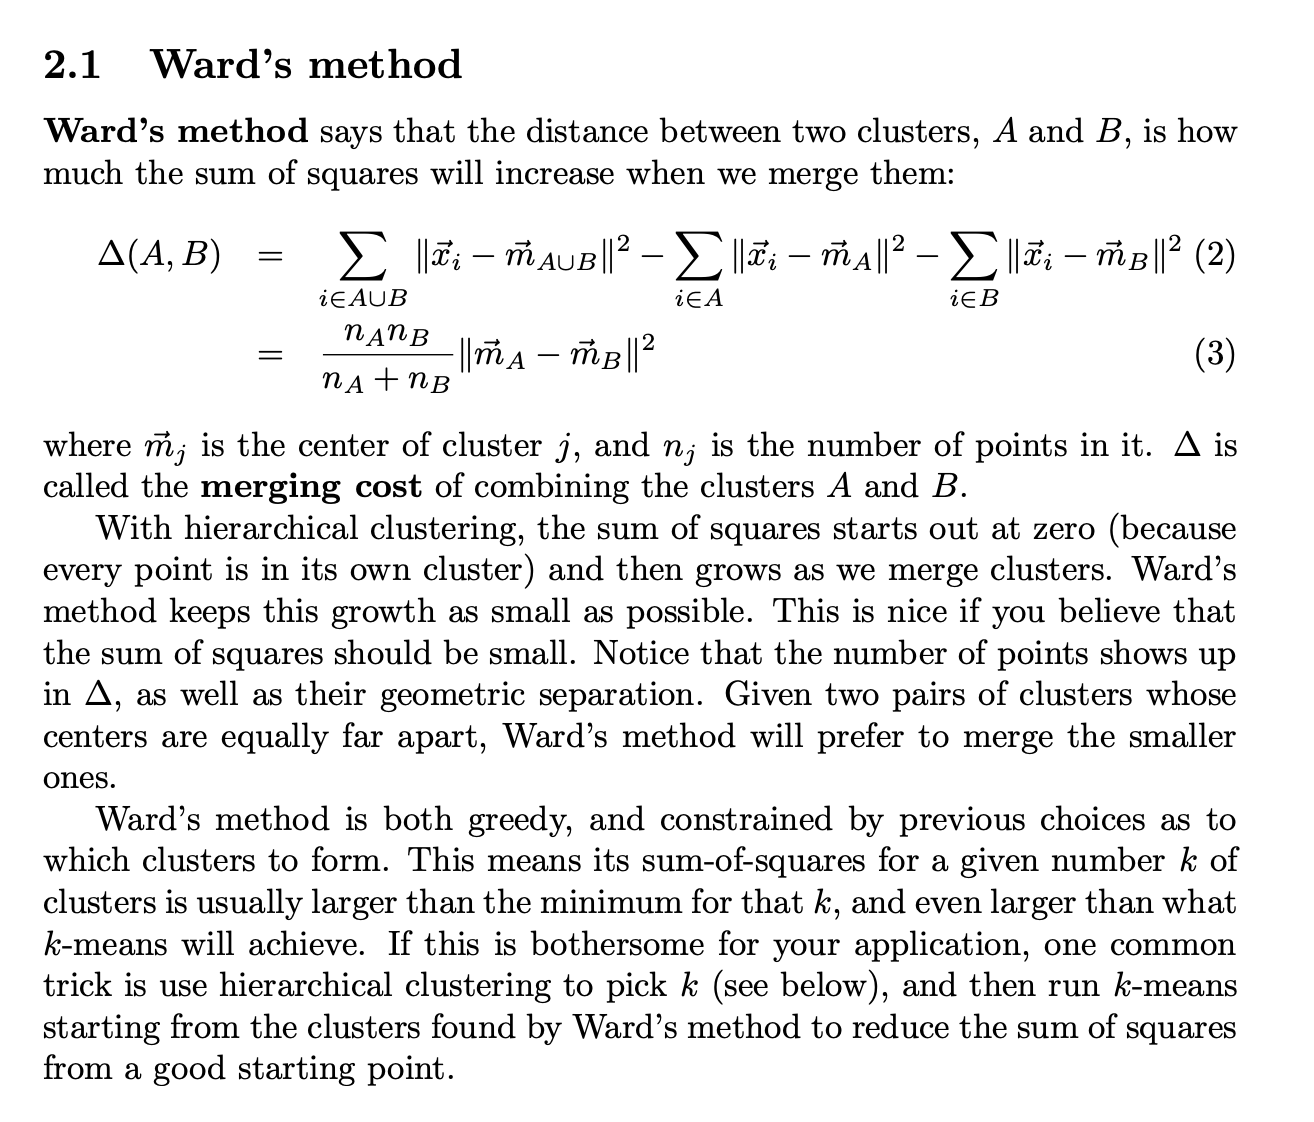

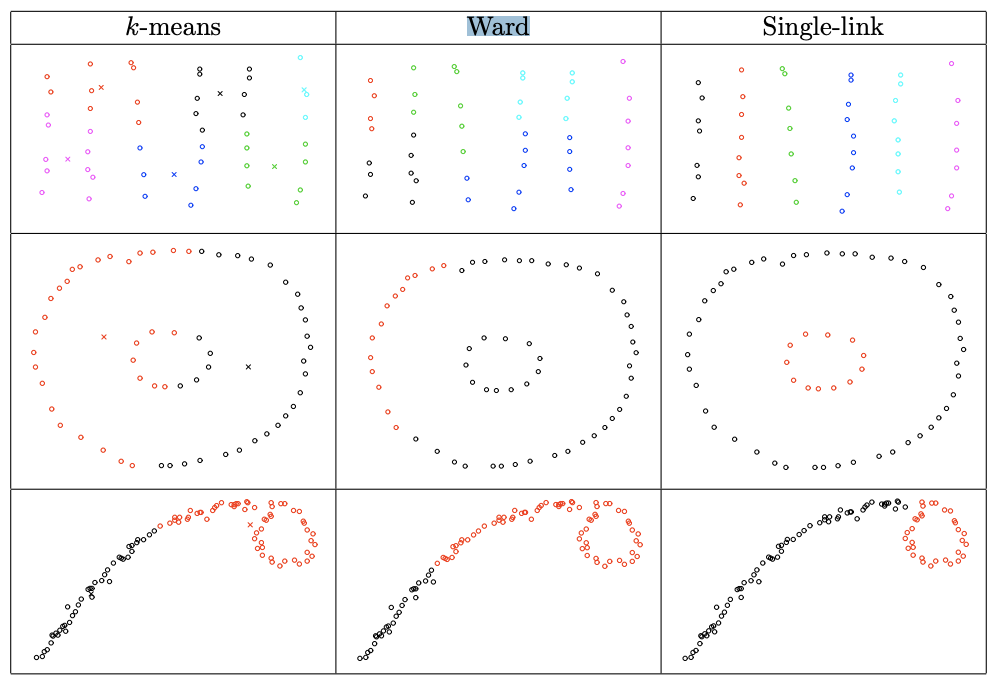

### [Ward's method](https://en.wikipedia.org/wiki/Ward%27s_method)

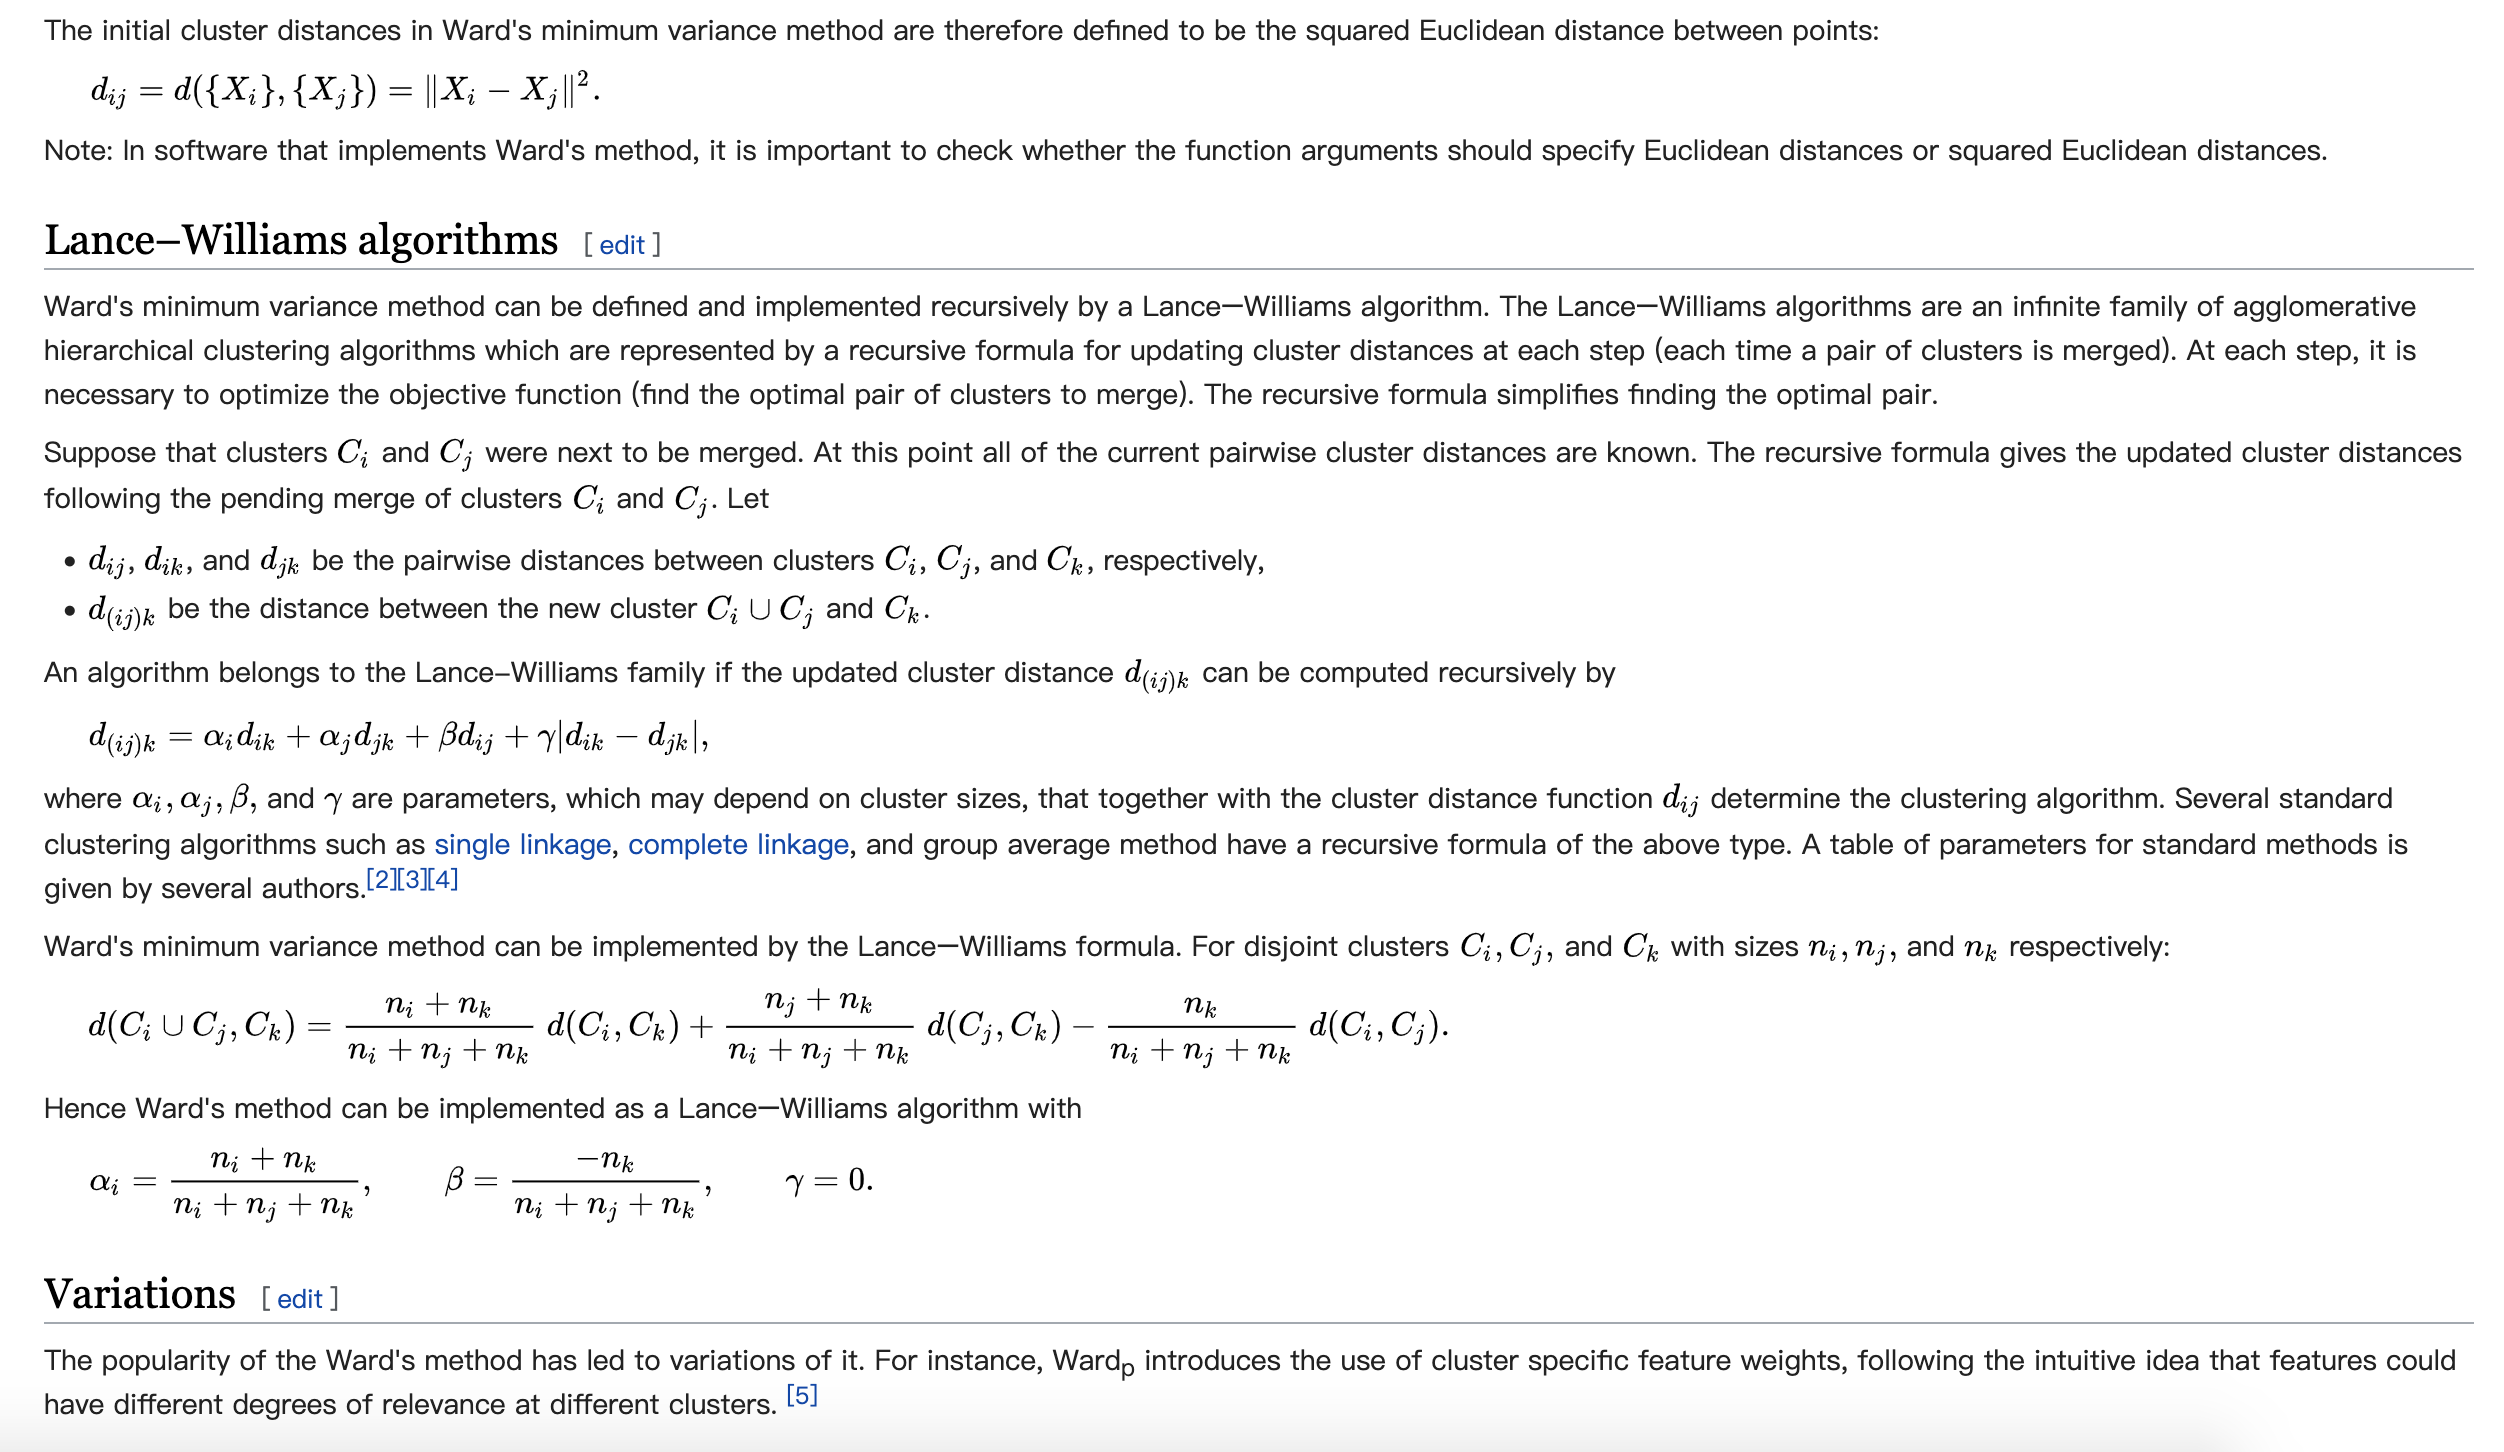

### [R筆記–(9)分群分析(Clustering)](http://rpubs.com/skydome20/R-Note9-Clustering)

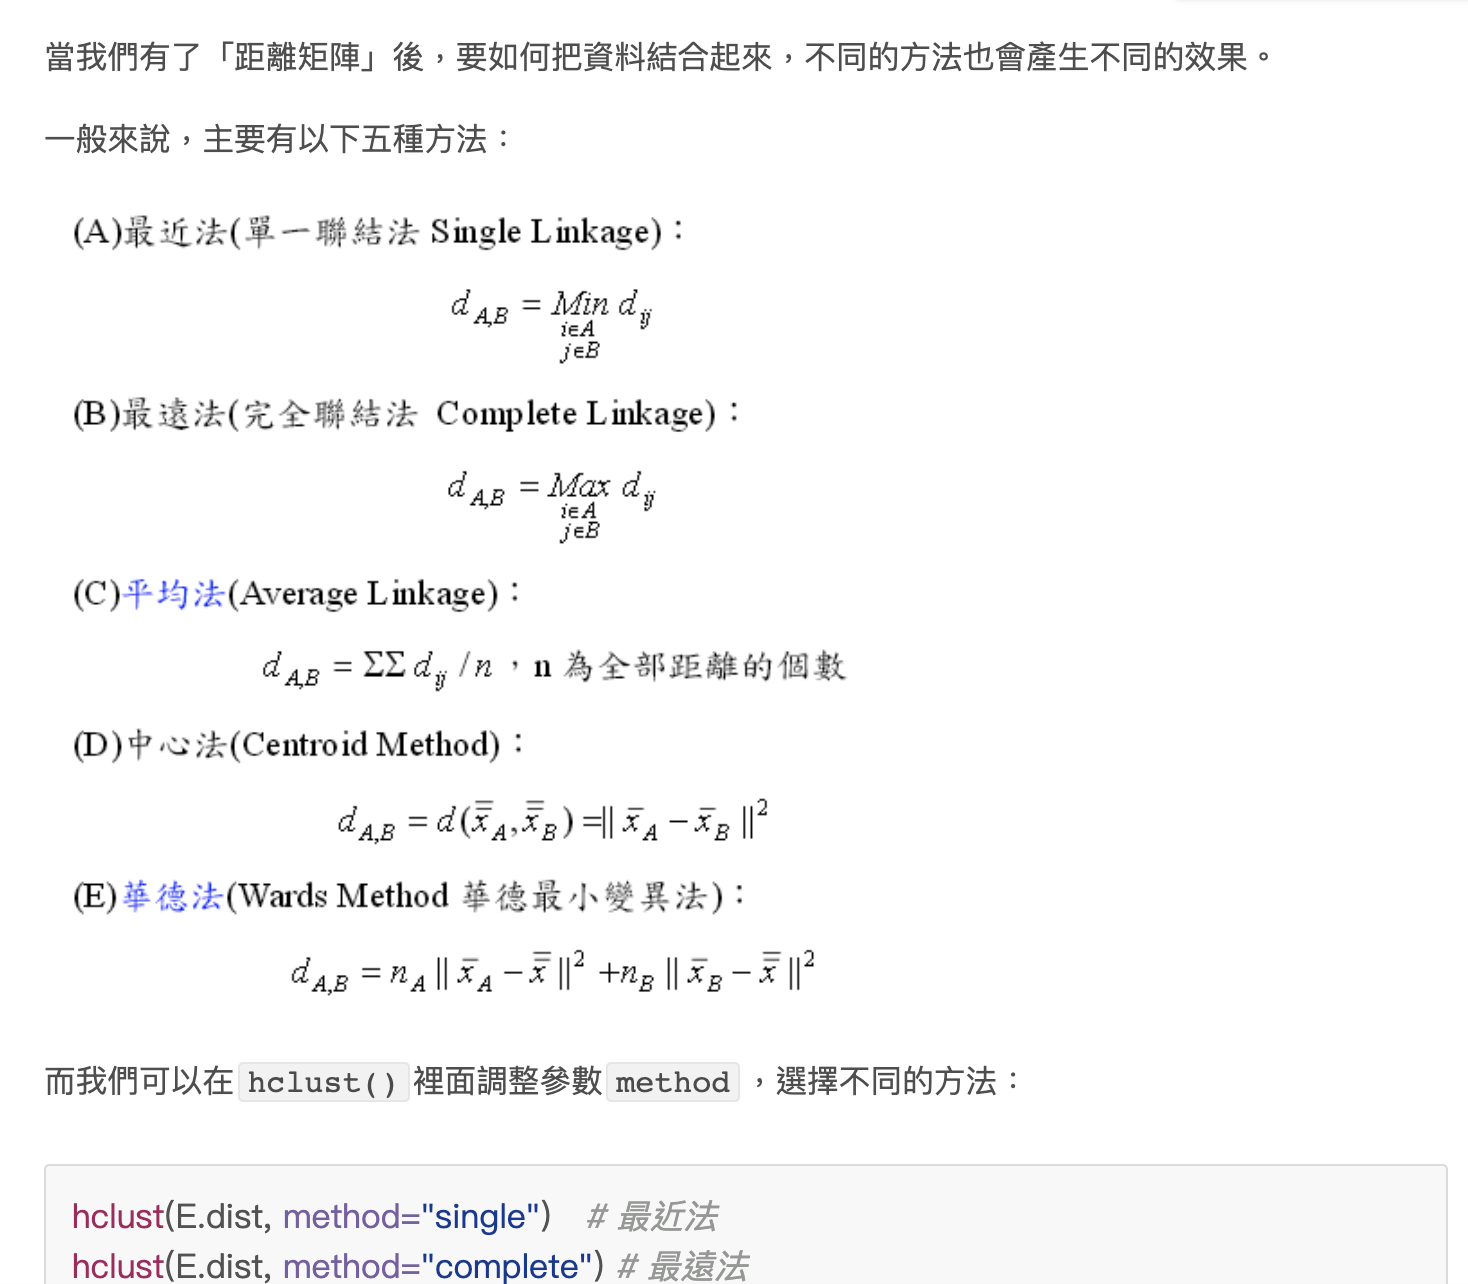

### [Hierarchical Clustering 階層式分群 | Clustering 資料分群 | R 統計](https://www.jamleecute.com/hierarchical-clustering-%E9%9A%8E%E5%B1%A4%E5%BC%8F%E5%88%86%E7%BE%A4/)